# Neural Network - Practical Lesson 10

## Overview
In this lesson we will see how machine learning techniques can be successfully applied to solve financial problems. We will first do a quick tour on the theory behind neural networks and then we will see an example and two practical applications: regression and classification.

## Neural networks
### Definition
Artificial Neural Networks (ANN) are information processing models that are developed by inspiring from the working principles of human brain. Their most essential property is the ability of learning from sample sets. The basic process units of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](neuron.jpeg)

A neuron (or more generally a perceptron) consists of weights ($w_i$) and real ($x_i$) numbers. All the inputs are individually weighted, added together and passed into the activation function. There are many different types of activation function but one of the simplest would be step function (another is the sigmoid). 

![Step function.](step_function.png)
![Sigmoid function.](sigmoid.png)

### Training of perceptrons

When teaching children how to recognize a bus, we just tell them, showing an example: “This is a bus. That is not a bus.” until they learn the concept of what a bus is. 
Furthermore, if the child sees new objects that she hasn’t seen before, we could expect her to recognize correctly whether the new object is a bus or not.
This is exactly the idea behind the perceptron.
Similarly, inputs from a *training* set are presented to the perceptron one after the other and weights are modified according to the expected output.

When an entire pass through all of the input training vectors is completed the perceptron has learnt ! At this time, if an input vector P (already in the training set) is given to the perceptron, it will output the correct value. If P is not in the training set, the network will respond with an output similar to other training vectors close to P.

Unfortunately using just a perceptron is not too useful since it is not possible to solve
the interesting problems we would like to face. The next step is then to put together more perceptron together in *layers*.

### Multi-layered neural networks

![A multi-layered neural network.](multilayer.jpeg)

Each input from the *input layer* is fed up to each node in the hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer.
But to train this network we need a learning algorithm which should be able to tune not only the weights between the output layer and the hidden layer but also the weights between the hidden layer and the input layer.

### Back propagation

First of all, we need to understand what do we lack. To tune the weights between the hidden layer and the input layer, we need to know the error at the hidden layer, but we know the error only at the output layer (We know the correct output from the training sample and we also know the output predicted by the network.)
So, the method that was suggested was to take the errors at the output layer and proportionally propagate them backwards to the hidden layer.

So, what we are doing is:

* We present a training sample to the neural network (initialised with random weights)
* Compute the output received by calculating activations of each layer and thus calculate the error
* Having calculated the error, we readjust the weights such that the error decreases
* We continue the process for all training samples several times until the weights are not changing too much

## Neural net to recognize handwritten digits

We don't usually appreciate how tough a problem our visual system solve (it involves 5 visual cortices containing 140 million neurons each). 
The difficulty of visual pattern recognition becomes apparent if you attempt to write a computer program to recognize digits like those below. 

![The so-called MNIST training sample](mnist_100_digits.png)

Simple intuitions about how we recognize shapes - "a 9 has a loop at the top, and a vertical stroke in the bottom right" - turn out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases. It seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits and then develop a system which can learn from those training examples. By increasing the number of training examples, the network can learn more about handwriting, and so improve its accuracy. So while I've shown just 100 training digits above, perhaps we could build a better handwriting recognizer by using thousands or even millions or billions of training examples (**remember that neural nets are not capable of extrapolating results !!!**).

Let's try to implement an ANN that is capable of recognize handwritten digits.
To start we need to install two new modules (from the command line type the following):

```pip install keras, mnist, tensorflow```

Our program will be based on a Convolutional Neural Network (CNN, will see later other two types of NN) which is designed for image/pattern recognition. It works essentially by applying on top of an image a series of filters (matrices) that works as edge detectors and with them it classifies images according to their features.

![](edges.jpg)

In [2]:
import numpy as np
# contains our dataset for training
import mnist 
# keras gives us all the tools to work with NN
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

# load the training and testing set
train_images = mnist.train_images() # the actual images
train_labels = mnist.train_labels() # the truth (it is 0, 1, 2...)
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# transform data for convenience
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

# definition of the actual network
num_filters = 8
filter_size = 3
pool_size = 2

# the input size reflects the size of the image with
# the numbers 28x28 pixels
# the output is given by 10 neurons returning the 
# probability that image is in each class.
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)), 
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation="softmax")
])

model.compile('adam', loss="categorical_crossentropy",
              metrics=['accuracy'])

model.fit(train_images,
          to_categorical(train_labels),
          epochs=3,
          validation_data=(test_images, to_categorical(test_labels)))

Using TensorFlow backend.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 222us/step - loss: 0.3369 - acc: 0.9025 - val_loss: 0.1855 - val_acc: 0.9461
Epoch 2/3
60000/60000 [==============================] - 14s 228us/step - loss: 0.1633 - acc: 0.9531 - val_loss: 0.1273 - val_acc: 0.9630
Epoch 3/3
60000/60000 [==============================] - 14s 226us/step - loss: 0.1211 - acc: 0.9649 - val_loss: 0.1092 - val_acc: 0.9682


In [10]:
predictions = model.predict(test_images[0:2])
for p in predictions:
    print (["{:.2f}".format(i) for i in p])

for i in range(2):
    print("The CNN predicted {} and it was {}".format( \
          np.argmax(predictions[i], axis=0), test_labels[i]))



['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00']
['0.00', '0.00', '0.99', '0.00', '0.00', '0.00', '0.01', '0.00', '0.00', '0.00']
The CNN predicted 7 and it was 7
The CNN predicted 2 and it was 2


I have tested the NN using digits written by me:

<img src="tre.png" width=80>
<img src="due.png" width=80>
<img src="cinque.png" width=80>

and the ANN worked with the three of them. This is the result with my 5:
```python
[5]
[0.00, 0.00, 0.00, 0.10, 0.00, 0.89, 0.00, 0.00, 0.00, 0.00]
```
Smaller probability *only* 89.4% (confused by the 3 10%) but still it works.

## Black-Scholes call options

The first practical application concerns the pricing of european call options. 
In this case I have generated by myself a large number of call options with a strike (100), a maturity (1 year), simulating the underlying development and trained the NN using as inputs: volatility, strike, maturity and underlying price. The truth is the price of the call computed using the Black-Scholes formula.

![](underlyings.png)

In this case I have used a *traditional* NN with an input layer with 4 neurons (the number of inputs), an hidden layer with 10 neurons and an output layer with 1 single neuron (since I need just a number, the price of the call).

In [ ]:
# Regression Example 
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

## just a way to load the dataset
dataset = pd.read_csv("training.csv")
X_train = dataset.iloc[:, :4].values
Y_train = dataset.iloc[:, 4].values

# NN defintion
model = Sequential()
model.add(Dense(10, input_dim=5, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(10, kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mse'])

# perform the actual training
history = model.fit(X_train, 
                    Y_train, 
                    epochs=1000, 
                    verbose=1)
model.save("bs_model.h5")

The training of a neural net is stochastic so it should be run multiple times to asses its performance.

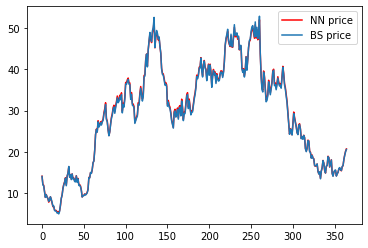

In [4]:
import pandas as pd
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('bs_model.h5')

dataset = pd.read_csv("testing.csv")
X_test = dataset.iloc[:, :4].values
Y_test = dataset.iloc[:, 4].values

plt.plot(model.predict(X_test), color="red", label="NN price")
plt.plot(Y_test, label="BS price")
plt.legend()
plt.show()

The agreement is pretty good. To illustrate how a neural network is not able to extrapolate results if the prediction is tried with inputs outside the phase-space of the training (i.e. testing sample different from the one used in the training) I have tried to predict the price of a call with different maturity (strike and vol are in the range of the training instead):

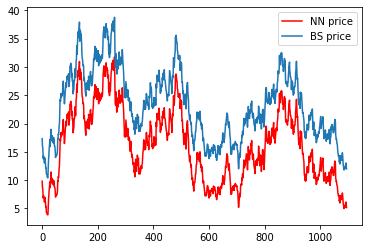

In [2]:
import pandas as pd
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('bs_model.h5')

dataset = pd.read_csv("testing2.csv")
X_test = dataset.iloc[:, :4].values
Y_test = dataset.iloc[:, 4].values

plt.plot(model.predict(X_test), color="red", label="NN price")
plt.plot(Y_test, label="BS price")
plt.legend()
plt.show()

## Technical Analysis
In finance, technical analysis is a security analysis discipline for forecasting the direction of prices through the study of past market data, primarily price and volume.
Essentially the analyst looks for particular patterns in the price time series that are *known* to develop in predictable ways to take profit of it.

<img src="H_and_s_top_new.jpg" width=400>
<img src="Triangle-ascending.jpg" width=400>

As you may imagine we will try to develop a CNN (like in the handwriting case) capable of classifying features in time series to be used in a technical analysis (this is much faster than having somebody looking at thousands of time series by eye...).

As in the previous application I have generated by myself the training set simulating 9000 time series (1/3 with head and shoulder patter, 1/3 with triangle pattern and 1/3 with no pattern). To make the training easier the features have been exagerated.

<figure>
<img src="image_1.png" width=300>
<figcaption>No pattern</figcaption>
</figure>

<figure>
<img src="image_2.png" width=300>
<figcaption>Head and shoulder pattern</figcaption>
</figure>

<figure>
<img src="image_0.png" width=300>
<figcaption>Tringle pattern</figcaption>
</figure>

In [17]:
import numpy as np
import json
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout
from keras.layers import MaxPooling1D, GlobalAveragePooling1D
from keras.utils import to_categorical

# load the training set
with open("training_tech_ana_labels.json", "r") as f:
    train_labels = json.load(f)

train_labels = train_labels[:900]
train_images = []

with open("training_tech_ana_images.json", "r") as f:
    train_images = json.load(f)
train_images = train_images[:900]

train_images = np.array(train_images)
train_images = np.expand_dims(train_images, axis=3)

# define the CNN 
model = Sequential()
model.add(Conv1D(filters=80, kernel_size=20, 
                 activation='relu', input_shape=(101, 1)))
model.add(Conv1D(filters=80, kernel_size=15, 
                 activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(filters=100, kernel_size=10, 
                 activation='relu'))
model.add(Conv1D(filters=100, kernel_size=5, 
                 activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(230, activation='relu'))
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# make the training
model.fit(train_images, to_categorical(train_labels), 
          epochs=150, batch_size=35, verbose=2)

model.save('tech_ana.h5')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


Epoch 1/150
 - 1s - loss: 2.0686 - acc: 0.3522
Epoch 2/150
 - 1s - loss: 1.0606 - acc: 0.3878
Epoch 3/150
 - 1s - loss: 0.9756 - acc: 0.4900
Epoch 4/150
 - 1s - loss: 0.8435 - acc: 0.5667
Epoch 5/150
 - 1s - loss: 0.7727 - acc: 0.5889
Epoch 6/150
 - 1s - loss: 0.7457 - acc: 0.6122
Epoch 7/150
 - 1s - loss: 0.6790 - acc: 0.5978
Epoch 8/150
 - 1s - loss: 0.6181 - acc: 0.6667
Epoch 9/150
 - 1s - loss: 0.6504 - acc: 0.6478
Epoch 10/150
 - 1s - loss: 0.6144 - acc: 0.6578
Epoch 11/150
 - 1s - loss: 0.6103 - acc: 0.6733
Epoch 12/150
 - 1s - loss: 0.5778 - acc: 0.6967
Epoch 13/150
 - 1s - loss: 0.6020 - acc: 0.6856
Epoch 14/150
 - 1s - loss: 0.5969 - acc: 0.6878
Epoch 15/150
 - 1s - loss: 0.6569 - acc: 0.6333
Epoch 16/150
 - 1s - loss: 0.5769 - acc: 0.6867
Epoch 17/150
 - 1s - loss: 0.5750 - acc: 0.6867
Epoch 18/150
 - 1s - loss: 0.5729 - acc: 0.6867
Epoch 19/150
 - 1s - loss: 0.5447 - acc: 0.7167
Epoch 20/150
 - 1s - loss: 0.5464 - acc: 0.7022
Epoch 21/150
 - 1s - loss: 0.5762 - acc: 0.7122
E

To test the perfomance I have created a longer time series and passed as input to the CNN a sliding time window to simulate the evolution of the price and a feature that is coming.
The goal is to check when the neural net is capable of predicting the incoming pattern.

<img src="closing_price.gif">

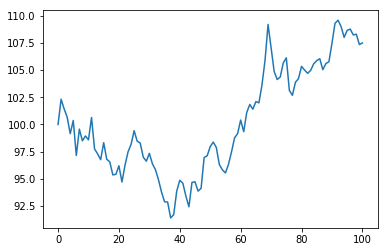

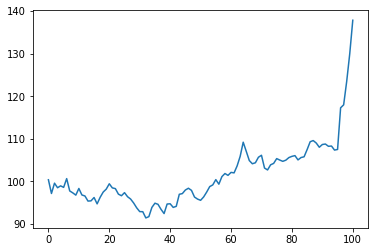

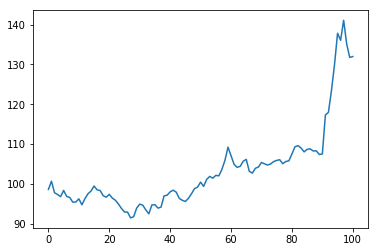

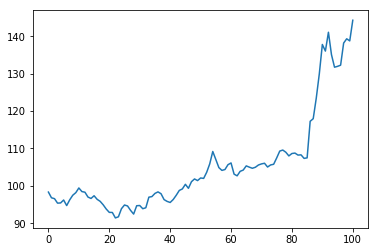

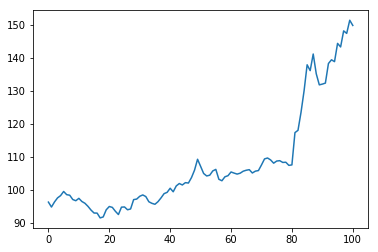

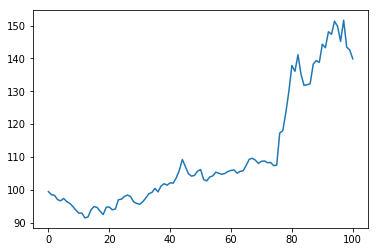

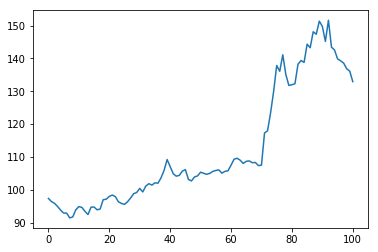

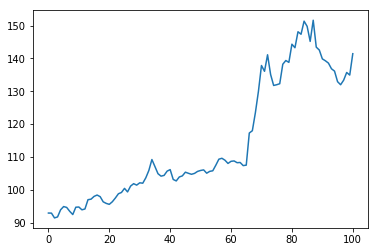

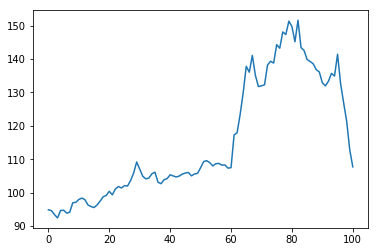

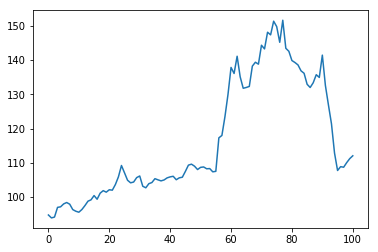

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


0 0.9059956
0 0.9251846
0 0.9130782
0 0.93703276
0 0.96242875
1 0.56031984
1 0.95728
1 0.88402504
1 1.0
1 1.0


In [12]:
import numpy as np
import json
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, GlobalAveragePooling1D
from keras.utils import to_categorical
from matplotlib import pyplot as plt

test_images = []

with open("testing_tech_ana_images_frames.json", "r") as f:
    test_images = json.load(f)

test_images = np.array(test_images)
for i in range(test_images.shape[0]):
    plt.plot(test_images[i, :])
    plt.show()
test_images = np.expand_dims(test_images, axis=3)

model = load_model('tech_ana_10000.h5')

predictions = model.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), max(predictions[i]))

So at the 6th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.